<a href="https://colab.research.google.com/github/Gowtham-123-AI071/1BM23AI071_DAV_LAB/blob/main/DAV_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df=pd.read_csv('/content/uber-raw-data-aug14.csv')
display(df)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


Text(0.5, 1.0, 'Uber Pickups by Day of Week and Hour of Day')

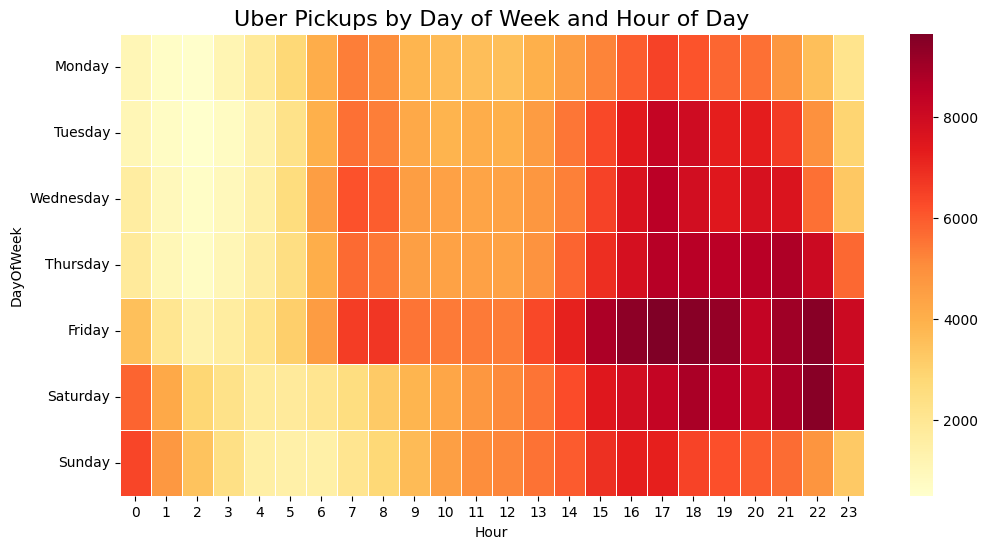

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/uber-raw-data-aug14.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Date/Time', aggfunc='count')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Date/Time', aggfunc='count')
heatmap_data = heatmap_data.reindex(days_order)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Uber Pickups by Day of Week and Hour of Day', fontsize=16)


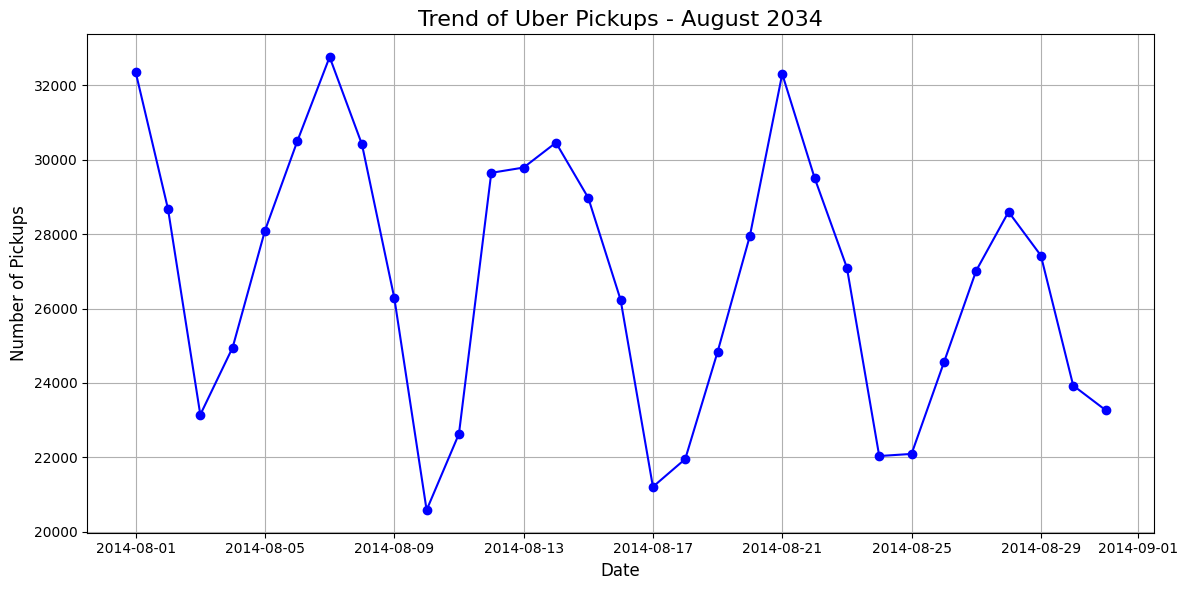

In [5]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
daily_pickups = df.groupby('Date').size()

plt.figure(figsize=(12,6))
plt.plot(daily_pickups.index, daily_pickups.values, marker='o', color='blue')
plt.title('Trend of Uber Pickups - August 2034', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
